# QuickSort vs TimSort (python .sort())
**Для pivot в начале**</br></br>
Работу выполнил студент Голев. А.С. 2022</br>
 @author: goliksim

In [2]:
from tqdm import tqdm
import numpy as np
import time
from matplotlib import pyplot as plt

In [8]:
def quicksort(array, L=0, R=None):
    if (L >= R):
        return 
    pivot = array[L]

    #pivot = array[(L+R)//2]
    i = L
    j = R+1
    while (True): 
        #sleep(1)
        while(True):
            i+=1
            # 4 3 2 6 7 8 1 5
            if((i > R) or (array[i] >= pivot)) : 
                break
        while(True):
            j-=1 
            if(array[j] <= pivot) : break
        if (i > j):
            break
        array[i], array[j] = array[j], array[i]
 
    array[L], array[j] = array[j], array[L]


    quicksort(array,L, j-1)
    quicksort(array,j+1, R)


    
    
    return 

#### При больших N

In [3]:
time_my = []
time_python = []
x_axis=[]
for n in tqdm(range(10,100000,200)):
   array = [int(200*n*x - 100*n) for x in np.random.rand(n)]
   b = array.copy()
   start = time.perf_counter()
   quicksort(b,0,len(array)-1)
   end = time.perf_counter()
   time_my.append(end-start)
   start = time.perf_counter()
   array.sort() #квиксорт
   end = time.perf_counter()
   if (b==array) : 
      time_python.append(end-start)
   x_axis.append(n)    

100%|██████████| 500/500 [01:10<00:00,  7.09it/s]


In [4]:
def show_graf(text, firstAr, secondAr):
    fig, axs = plt.subplots(1,2, figsize=(15,5))
    axs[0].plot(x_axis, firstAr,color='tab:blue')
    axs[0].set_title(text)
    axs[0].set_ylabel('MyQuick',color = 'tab:blue')
    axs[0].set_xlabel('N')

    ax2 = axs[0].twinx()  

    ax2.plot(x_axis, secondAr,color='tab:red')
    ax2.set_ylabel('PythonQuick',color = 'tab:red')

    axs[1].plot(x_axis, firstAr,color='tab:blue')
    axs[1].set_title(text)
    axs[1].set_xlabel('N')

    axs[1].plot(x_axis, secondAr,color='tab:red')
    axs[1].legend(['MyQuick','PythonQuick'])
    #ax3.set_ylabel('PythonQuick',color = 'tab:red')

    fig.autofmt_xdate()
    fig.tight_layout()

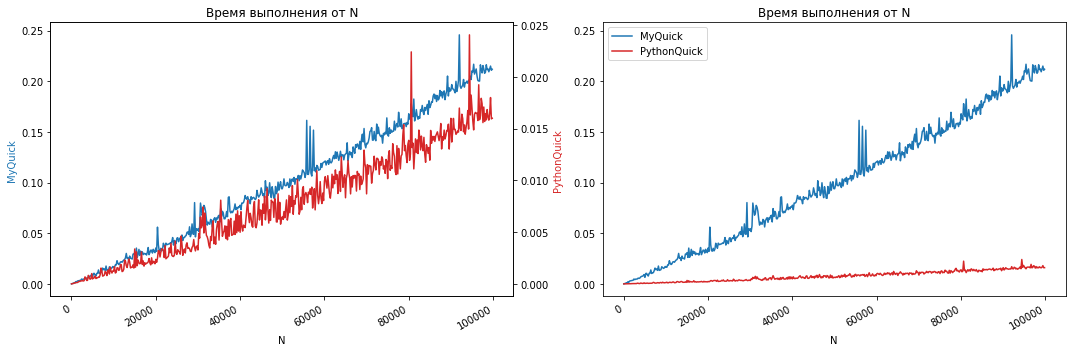

In [5]:
show_graf('Время выполнения от N',time_my,time_python)

#### При малых N

In [6]:
time_my_small = []
time_python_small = []
x_axis=[]
for n in tqdm(range(10,10000,50)):
   array = [int(200*n*x - 100*n) for x in np.random.rand(n)]
   b = array.copy()
   start = time.perf_counter()
   quicksort(b,0,len(array)-1)
   end = time.perf_counter()
   time_my_small.append(end-start)
   start = time.perf_counter()
   array.sort() #квиксорт
   end = time.perf_counter()
   
   if (b==array) : 
      time_python_small.append(end-start)
   x_axis.append(n)  

100%|██████████| 200/200 [00:02<00:00, 79.22it/s] 


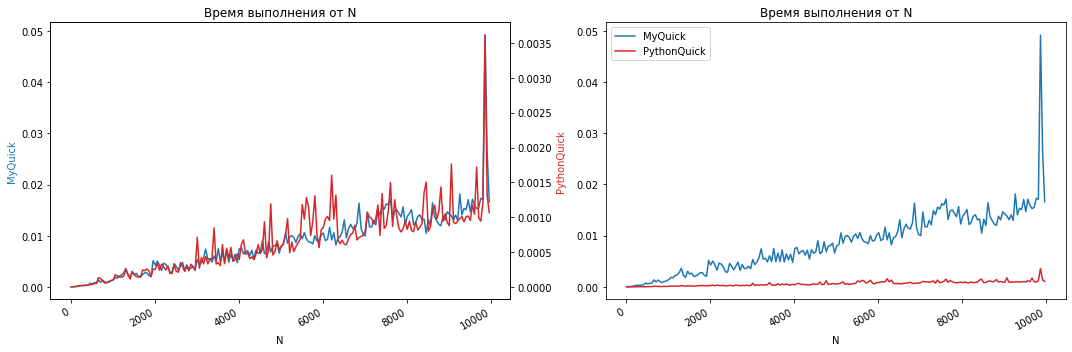

In [7]:
show_graf('Время выполнения от N',time_my_small,time_python_small)

In [3]:
main_array =  np.array([int(2000000*x) for x in np.random.rand(1000)])

### Создаем матрицу неупорядоченности

In [4]:
def bubblesort(i, a, reversed=False):
    N = len(a)
    #prov = 0
    for j in range(N-i-1):
        if not reversed:
            if (a[j] > a[j+1] ):
                a[j], a[j+1] = a[j+1], a[j]
                #prov+=1
        else:
            if (a[j] < a[j+1] ):
                a[j], a[j+1] = a[j+1], a[j]
                #prov+=1
    #if (prov==0):
    #    raise
    return a
	

In [5]:
def get_matrix(main_array):
    sorted_matrix = []
    direct_sort = []
    reversed_sort = []
    direct_sort.append([*main_array.copy()])
    reversed_sort.append([*main_array.copy()])

    N = len(direct_sort[0])
    for i in tqdm(range(N-1)):
        try:
            direct_sort.append([*bubblesort(i, direct_sort[-1].copy())])
        except:
            pass
        try:
            reversed_sort.append([*bubblesort(i, reversed_sort[-1].copy(),True)])
        except:
            pass
    sorted_matrix = reversed_sort[::-1] + direct_sort[1::1]
    return sorted_matrix

In [6]:
sorted_matrix = get_matrix(main_array)

100%|██████████| 999/999 [00:00<00:00, 4285.53it/s]


In [9]:
time_my_matrix = []
for array,i in zip(sorted_matrix[::5],tqdm(range(len(sorted_matrix[::5])))):
    b = array.copy()
    start = time.perf_counter()
    quicksort(b,0,len(array)-1)
    end = time.perf_counter()
    time_my_matrix.append(end-start)

   

100%|█████████▉| 399/400 [00:04<00:00, 86.48it/s] 


In [ ]:
sorted_matrix

In [10]:

from time import sleep


time_python_matrix = []
for array,i in zip(sorted_matrix[::5],tqdm(range(len(sorted_matrix[::5])))):
    b = array.copy()
    start = time.perf_counter()
    b.sort()
    end = time.perf_counter()
    time_python_matrix.append(end-start)


100%|█████████▉| 399/400 [00:00<00:00, 8722.65it/s]


In [11]:
def show_graf_matrix(text, firstAr, secondAr):
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    axs[0].plot(np.arange(len(firstAr)), firstAr,color='tab:blue')
    axs[0].set_title(text)
    axs[0].set_ylabel('MyQuick',color = 'tab:blue')
    axs[0].set_xlabel('N')

    ax2 = axs[0].twinx()  

    ax2.plot(np.arange(len(secondAr)), secondAr,color='tab:red')
    ax2.set_ylabel('PythonQuick',color = 'tab:red')

    axs[1].plot(np.arange(len(firstAr)), firstAr,color='tab:blue')
    axs[1].set_title(text)
    axs[1].set_xlabel('N')
    axs[1].plot(np.arange(len(secondAr)), secondAr,color='tab:red')
    axs[1].legend(['MyQuick','PythonQuick'])
  

    fig.autofmt_xdate()
    fig.tight_layout()

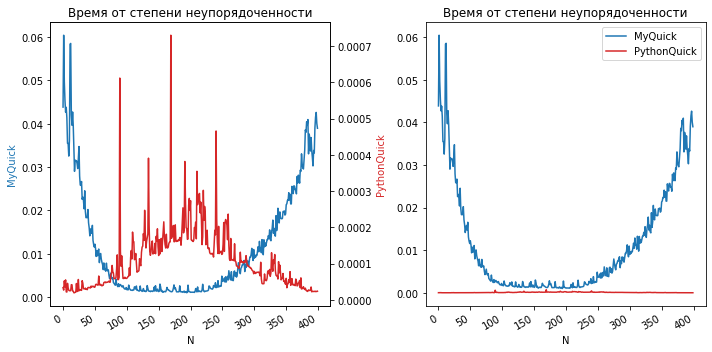

In [12]:
show_graf_matrix('Время от степени неупорядоченности',time_my_matrix,time_python_matrix)

In [75]:
array = [1,43,7,4,6,9,0,3,6,8,0,2]
quicksort(array,0,len(array)-1)

print(array)

[0, 0, 1, 2, 3, 4, 6, 6, 7, 8, 9, 43]
